In [164]:
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
def calculation_result(x_test,y_test,y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    # Mengukur kinerja model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

    # Menampilkan hasil
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'AUC-ROC Score: {roc_auc:.2f}')

In [166]:
data = pd.read_csv('parkinson.csv')

data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [168]:
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

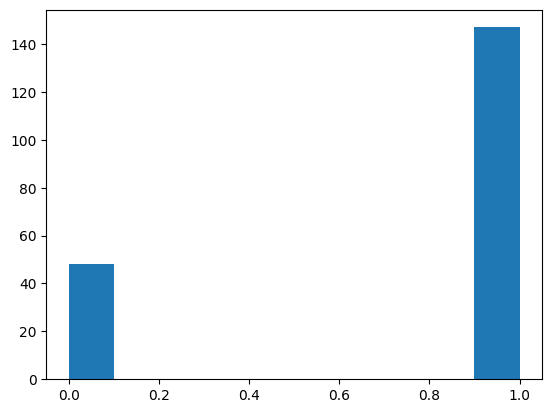

In [169]:
plt.hist(data['status'])
plt.show()

In [170]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = data.drop(columns=['status','name'])
x = scaler.fit_transform(x)

In [171]:
x

array([[0.18430827, 0.11259173, 0.05481479, ..., 0.58576513, 0.39066128,
        0.4973096 ],
       [0.19832685, 0.09493044, 0.2783228 , ..., 0.74133704, 0.47314522,
        0.67132602],
       [0.16503854, 0.05912816, 0.26528838, ..., 0.68637091, 0.40881938,
        0.59668246],
       ...,
       [0.50273036, 0.28141298, 0.05072714, ..., 0.34257652, 0.55896743,
        0.18057983],
       [0.6428929 , 0.60180655, 0.05427936, ..., 0.45288473, 0.31822198,
        0.16313677],
       [0.73327434, 0.32279413, 0.07194837, ..., 0.41509481, 0.50367281,
        0.21545975]])

In [172]:
from sklearn.model_selection import train_test_split

y = data['status']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [173]:
from imblearn.over_sampling import SMOTE

In [174]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

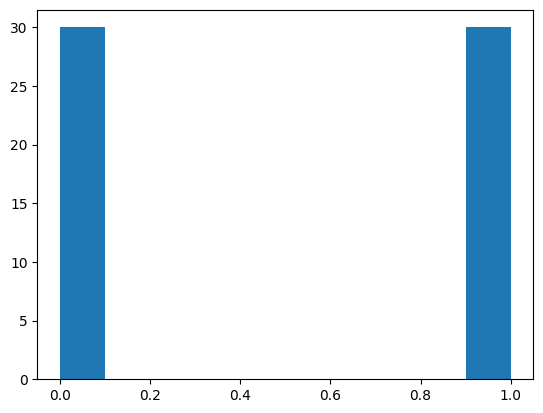

In [175]:
plt.hist(y_resampled)
plt.show()

In [176]:
X_resampled

array([[0.10585544, 0.02170305, 0.1590671 , ..., 0.70710843, 0.42344613,
        0.4112044 ],
       [0.15265002, 0.05028323, 0.14764471, ..., 0.53234103, 0.43837183,
        0.36447969],
       [0.35196074, 0.11474938, 0.42323857, ..., 0.39661743, 0.36846737,
        0.23976861],
       ...,
       [0.25555629, 0.86380621, 0.16096495, ..., 0.25330305, 0.37217768,
        0.20597258],
       [0.15779151, 0.03725466, 0.13515708, ..., 0.33321796, 0.21998443,
        0.15963736],
       [0.70439115, 0.3085672 , 0.08038917, ..., 0.4151994 , 0.49166091,
        0.2225691 ]])

In [177]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

model = LR.fit(x_train,y_train)

In [178]:
calculation_result(x_test,y_test,model.predict(x_test))

Accuracy: 0.81
Precision: 0.80
Recall: 1.00
F1 Score: 0.89
AUC-ROC Score: 0.90


### RANDOM FOREST

In [179]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [184]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [185]:
calculation_result(x_test,y_test,clf.predict(x_test))

Accuracy: 0.87
Precision: 0.89
Recall: 0.94
F1 Score: 0.91
AUC-ROC Score: 0.90
